<a href="https://colab.research.google.com/github/franciscofijamo/rocket_science-Inc_predict-_maintence/blob/master/Rocket_Science_Inc_predict__maintence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema Description 

### Link business Problem

https://sejaumdatascientist.com/o-projeto-de-machine-learning-para-o-seu-portfolio/


**Característica do Conjunto de Dados**

O arquivo “train_FD001.txt” possui 26 colunas
Cada linha desse conjunto de dados representa 1 ciclo de medições. As medições são feitas por 21 sensores e 3 valores de ajuste, como descrito nas colunas.
Cada motor possui um ciclo máximo de medição, após esse ciclo máximo é esperado um número de ciclos até a falha do motor. Esse número de ciclos esperados até a falha é chamado de RUL ( Remaining Useful Life ).
Por exemplo, o número máximo de ciclos do motor 01 é 192, como descrito na imagem abaixo. Após o ciclo 192, é esperado 112 ciclos até a falha.
O valor 112 é o número de ciclos esperados até a falha ( RUL ). Esse valor pode ser encontrado no arquivo  “RUL_FD001”, como na figura abaixo.

A primeira linha mostra um valor de 112 para RUL. Esse valor corresponde ao número de ciclos estimado, até a falha, para o motor 01.
A segunda linha mostra um valor de 98 para RUL, que corresponde ao número de ciclos estimado, até falha, para o motor 02. E assim por diante.
O seu objetivo como Data Scientist é prever o valor do RUL para os motores do conjunto de dados de teste “RUL_FD001.txt” e responder à essa pergunta.

***Quantos ciclos cada motor ainda possui até a falha?**


# Roteiro Sugerido para a Resolução
Esse é o roteiro de resolução do desafio que eu sugiro:

Leia os 3 arquivos em um Jupyter Notebook e renomeia as colunas.
Defina o tipo desse problema: Regressão, Classificação ou Clusterização.
Faça testes Estatísticos procurando por incoerências nos dados.
Crie novas variáveis para modelar melhor o fenômeno, se necessário.
Verifique se as variáveis possuem o mesmo peso, em termos de importância, para o modelo.
Aplique diferentes algoritmos de Machine Learning.
Compare os algoritmos sob a mesma métrica de performance, a mais apropriada.
Garanta que seu modelo não possui “Overfit”, ou seja, uma memorização ao invés de aprendizado.
Escreva os valores de previsão do RUL e seu intervalo de confiança para cada motor do arquivo de teste.
Escreve um breve explicação do raciocínio da sua solução.

# 1.0 Imports

In [181]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt


from IPython.core.display     import HTML
from IPython.display          import Image

## Import Data

In [18]:
df =pd.read_csv('RUL_FD001.txt', header=None)
df1 = pd.read_csv('train_FD001.txt', sep= ' ', header=None)
df1_test = pd.read_csv('test_FD001.txt', sep= ' ', header=None)

In [19]:
print( 'df1_teste shape {}, df1 shape{}'.format(df1_test.shape, df1.shape))

df1_teste shape (13096, 28), df1 shape(20631, 28)


## Describe Data

In [45]:
# df1.info()
# df1.shape
# df1.isna().sum()
# df1.describe()
df.head()

,0
0,112
1,98
2,69
3,82
4,91


## Rename Cols

In [26]:
cols = ['motor_id',
        'cicle',
        'settings01',
        'settings02',
        'settings03',
        'tag1',
        'tag2',
        'tag3',
        'tag4',
        'tag5',
        'tag6',
        'tag7',
        'tag8',
        'tag9',
        'tag10',
        'tag11',
        'tag12',
        'tag13',
        'tag14',
        'tag15',
        'tag16',
        'tag17',
        'tag18',
        'tag19',
        'tag20',
        'tag21',
        'tag22',
        'tag23']

df1.columns = cols

## help functions

In [167]:
df2 = df1.copy()

In [169]:
# delete Nan columns
df2 = df1.drop(['tag22', 'tag23'], axis=1)



# adjust jupyter notebook viz
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()


Populating the interactive namespace from numpy and matplotlib


In [170]:
df2.head()

,motor_id,cicle,settings01,settings02,settings03,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,tag11,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [108]:
df2 = df2.rename({'motor_id':'motor_id'}, axis=1)

In [171]:
df_motor_1 = df2[df2["motor_id"] == 1]
# df_motor_1 = df2.drop(['motor_id'], axis=1)


In [172]:
df_motor_1.tail()

,motor_id,cicle,settings01,settings02,settings03,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,tag11,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,21.61,551.94,2388.31,9037.91,1.3,48.00,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,21.61,550.70,2388.27,9044.55,1.3,48.08,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,21.61,551.29,2388.29,9040.58,1.3,48.33,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,21.61,550.92,2388.28,9042.76,1.3,48.15,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,21.61,551.25,2388.32,9033.22,1.3,48.25,520.08,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649


# 2.0 Descriptive analysis

In [116]:
df_motor_1.head()


,motor_id,cicle,settings01,settings02,settings03,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,tag11,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21,tag22,tag23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [173]:
# create dataframe settings
motor_1_settings = df_motor_1[['settings01', 'settings02', 'settings03']]

# create dataframe taggs
motor_1_tag = df_motor_1[['tag1','tag2','tag3','tag4','tag5','tag6','tag7','tag8','tag9','tag10','tag11','tag12','tag13','tag14','tag15','tag16','tag17','tag18','tag19','tag20','tag21']]

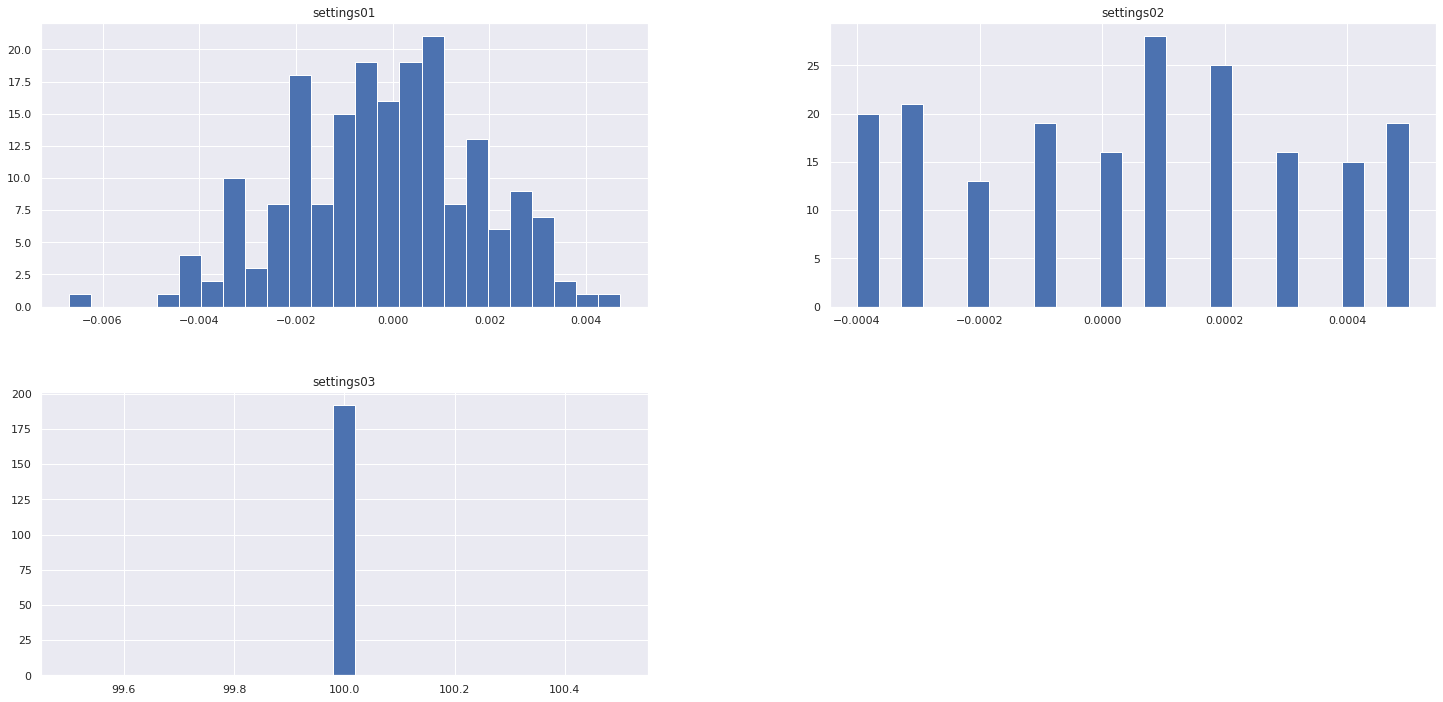

In [118]:
# motor_1_settings.head()
# # sns.distplot(df4['sales']);
# sns.distplot(motor_1_settings['settings01']);

motor_1_settings.hist(bins = 25);

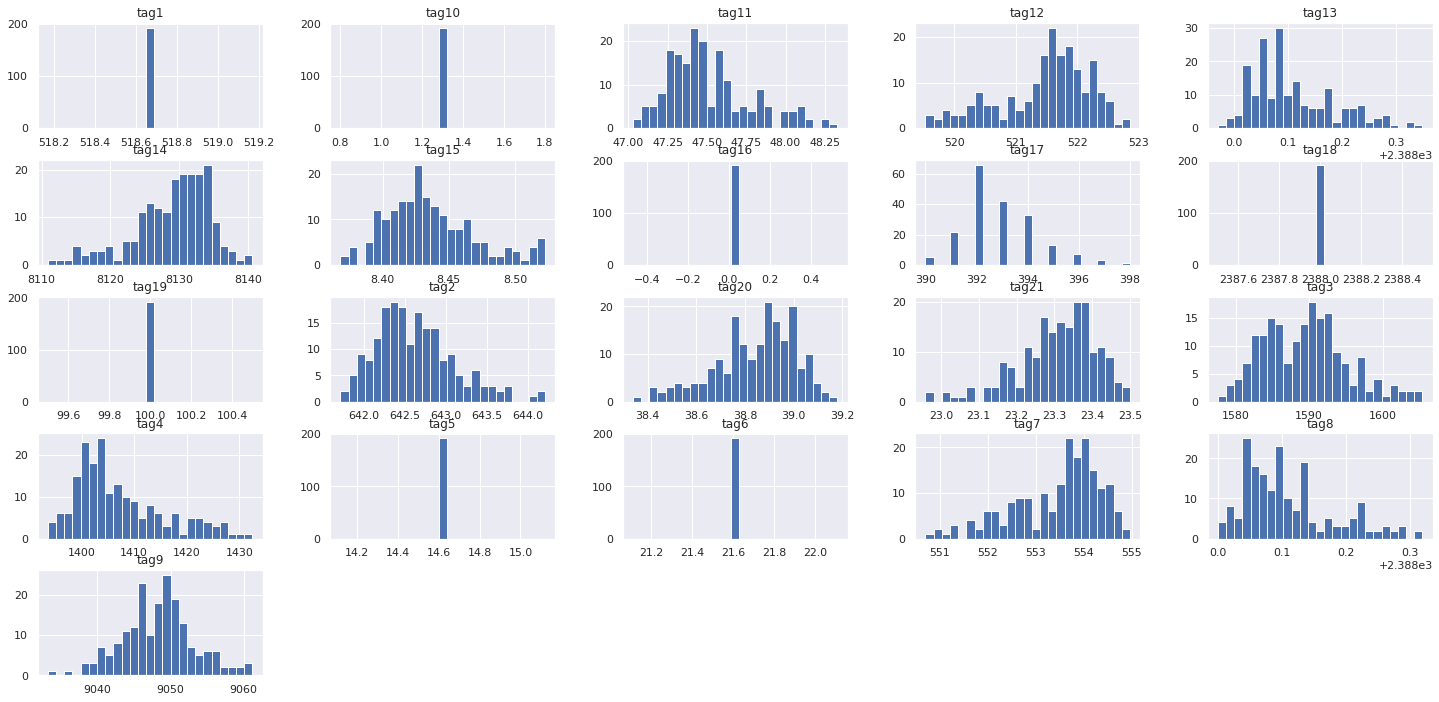

In [119]:
motor_1_tag.hist(bins = 25);

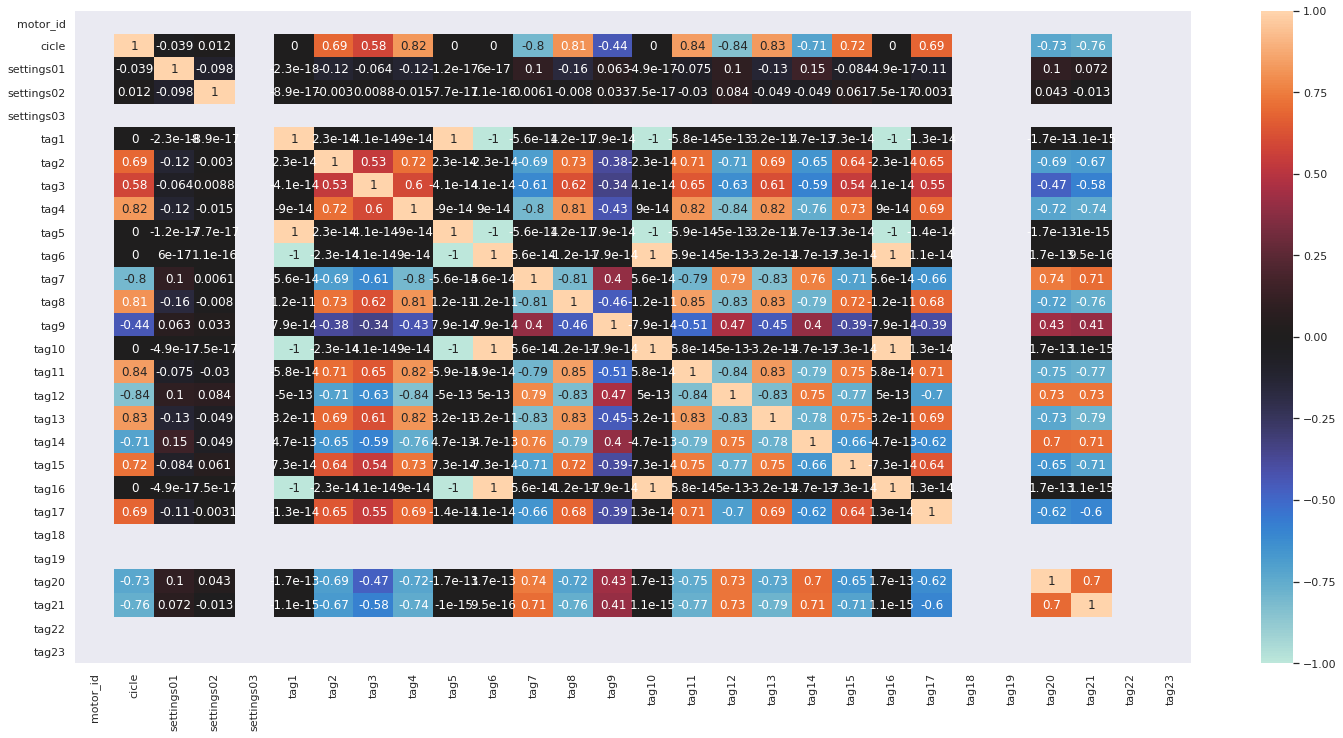

In [120]:
correlation_all = df_motor_1.corr(method  = 'pearson')  
sns.heatmap(correlation_all, annot = True, vmin = - 1 , vmax = 1 , center =  0);

In [174]:
df_motor_1.tail()

,motor_id,cicle,settings01,settings02,settings03,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,tag11,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,21.61,551.94,2388.31,9037.91,1.3,48.00,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,21.61,550.70,2388.27,9044.55,1.3,48.08,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,21.61,551.29,2388.29,9040.58,1.3,48.33,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,21.61,550.92,2388.28,9042.76,1.3,48.15,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,21.61,551.25,2388.32,9033.22,1.3,48.25,520.08,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649


In [175]:
num_atributes = motor_1_tag.select_dtypes(include = ['int64', 'float64', 'int32'])
df_motor_1 = df_motor_1.select_dtypes(include = ['int64', 'float64', 'int32'])

In [176]:
tag_mean = pd.DataFrame(num_atributes.apply(np.mean)).T
settings_mean = pd.DataFrame(motor_1_settings.apply(np.mean)).T
df1_mean= pd.DataFrame(df_motor_1.apply(max)).T


In [177]:
df1_mean['cicle'] = df_motor_1['cicle'].max()

In [127]:
df1_mean = df1_mean.drop(['tag22', 'tag23'], axis=1)


In [193]:
df_RF = df[0][0]
df_RF

112

In [ ]:
# metrics = pd.concat([df1_mean,RF]).T.reset_index()

In [188]:
df1_mean

,motor_id,cicle,settings01,settings02,settings03,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,tag11,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21
0,1.0,192,0.0047,0.0005,100.0,518.67,644.21,1605.44,1432.52,14.62,21.61,554.96,2388.32,9061.21,1.3,48.33,522.86,2388.35,8140.58,8.5227,0.03,398.0,2388.0,100.0,39.18,23.4999
